# Drug Groupings

In [1]:
%run -m ipy_startup
%run -m ipy_logging
%run -m ipy_seaborn
%matplotlib inline
from mgds.data_aggregation import api
from mgds.data_aggregation import database as db
from mgds.data_aggregation import source as src
from mgds.data_aggregation import data_type as dtyp
from mgds.data_aggregation import entity
from mgds.data_modeling import data_broker as dbm
from mgds.data_modeling import training01 as rx_train
from mgds.data_modeling import data as feature_data

In [2]:
df = api.get_raw_genomic_data(src.GDSC_v2, dtyp.DRUG_SENSITIVITY)
df['INDICATOR'] = 1

In [3]:
df.head()

,IC50_RESULTS_ID,CELL_LINE_ID:COSMIC,DRUG_ID:COSMIC,MAX_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY,CELL_LINE_ID,CELL_LINE_ID:MGDS,PRIMARY_SITE:MGDS,PRIMARY_SITE:SOURCE,DRUG_NAME:MGDS,DRUG_NAME:SOURCE,INDICATOR
0,335,924100,1026,1.0,0.717722,0.899410,0.105665,17-AAG,tanespimycin,HSP90,other,22RV1,22RV1,PROSTATE,PROSTATE,17AAG,17-AAG,1
1,336,924100,1028,2.0,2.664100,0.957206,0.178243,VX-702,NaN,p38,JNK and p38 signaling,22RV1,22RV1,PROSTATE,PROSTATE,VX702,VX-702,1
2,337,924100,1029,2.0,3.336828,0.973893,0.079845,AMG-706,AMG-706,"VEGFR, RET, c-KIT, PDGFR",RTK signaling,22RV1,22RV1,PROSTATE,PROSTATE,AMG706,AMG-706,1
3,338,924100,1030,10.0,5.164909,0.977844,0.094228,KU-55933,NaN,ATM,Genome integrity,22RV1,22RV1,PROSTATE,PROSTATE,KU55933,KU-55933,1
4,339,924100,1031,0.2,-4.325309,0.508180,0.090478,Elesclomol,NaN,HSP70,other,22RV1,22RV1,PROSTATE,PROSTATE,ELESCLOMOL,Elesclomol,1


In [4]:
d_path = df[['DRUG_NAME:MGDS', 'TARGET_PATHWAY']].drop_duplicates()

In [5]:
d_path[d_path['DRUG_NAME:MGDS'] == 'NAVITOCLAX']

,DRUG_NAME:MGDS,TARGET_PATHWAY
197,NAVITOCLAX,apoptosis regulation


In [6]:
d_path['TARGET_PATHWAY'].value_counts()

other                             72
RTK signaling                     26
PI3K signaling                    18
ERK MAPK signaling                16
DNA replication                   14
cell cycle                        11
cytoskeleton                      11
chromain  histone acetylation     10
mitosis                           10
ABL signaling                      9
Genome integrity                   8
EGFR signaling                     8
apoptosis regulation               7
TOR signaling                      7
JNK and p38 signaling              6
IGFR signaling                     4
p53 pathway                        3
metabolism                         3
WNT signaling                      3
chromatin  other                   3
chromatin  histone methylation     2
Name: TARGET_PATHWAY, dtype: int64

In [7]:
d_path[d_path['TARGET_PATHWAY'] == 'apoptosis regulation']

,DRUG_NAME:MGDS,TARGET_PATHWAY
32,TW37,apoptosis regulation
53,RTRAIL,apoptosis regulation
89,EMBELIN,apoptosis regulation
91,PAC1,apoptosis regulation
97,OBATOCLAX,apoptosis regulation
144,YM155,apoptosis regulation
197,NAVITOCLAX,apoptosis regulation


In [8]:
"','".join(d_path[d_path['TARGET_PATHWAY'] == 'apoptosis regulation']['DRUG_NAME:MGDS'].values)

"TW37','RTRAIL','EMBELIN','PAC1','OBATOCLAX','YM155','NAVITOCLAX"

# Correlations

In [14]:
dt = df[df['LN_IC50'].notnull()]
dt.groupby(['CELL_LINE_ID:MGDS', 'DRUG_NAME:MGDS']).size().value_counts()

1    205148
dtype: int64

In [18]:
dc = df[df['CELL_LINE_ID:MGDS'].notnull()]
dc = dc.pivot(index='CELL_LINE_ID:MGDS', columns='DRUG_NAME:MGDS', values='LN_IC50')
dc.head()

DRUG_NAME:MGDS,17AAG,5FLUOROURACIL,5Z7OXOZEAENOL,681640,A443654,A770041,AC220,AFATINIB,AG014699,AICAR,...,XMD892,Y39983,YK4279,YM155,YM201636,ZG10,ZIBOTENTAN,ZLLNLECHO,ZM447439,ZSTK474
CELL_LINE_ID:MGDS,,,,,,,,,,,,,,,,,,,,,
201T,-1.714008,3.770916,NaN,2.861394,NaN,NaN,1.191040,NaN,4.700540,10.164367,...,NaN,4.953417,NaN,-1.478410,1.339958,NaN,5.727925,NaN,2.853266,0.552314
22RV1,0.717722,0.599834,2.510877,2.687990,NaN,NaN,3.055242,4.165454,2.813023,8.329869,...,4.647239,4.981842,2.661789,-5.184732,1.304883,2.269553,6.153517,NaN,3.588219,-0.581419
2313287,-2.270127,1.377006,1.290695,2.445952,NaN,NaN,2.380925,4.312399,4.294719,8.592325,...,NaN,3.471085,0.811247,-3.129232,1.019614,NaN,5.590160,NaN,3.288567,0.048097
42MGBA,-2.503345,2.211866,0.577442,1.955192,NaN,NaN,1.973690,4.415150,2.339015,7.604888,...,NaN,4.263127,1.193378,-5.875563,2.609145,NaN,5.655940,NaN,1.379312,2.252558
451LU,-2.794440,4.657338,-3.382185,NaN,NaN,NaN,2.519690,3.483061,3.406131,8.156105,...,2.096665,4.903078,1.010833,-3.733765,2.578167,1.681739,5.372183,NaN,NaN,2.236231


In [32]:
dc_spearman = dc.corr(method='spearman')
dc_pearson = dc.corr(method='pearson')

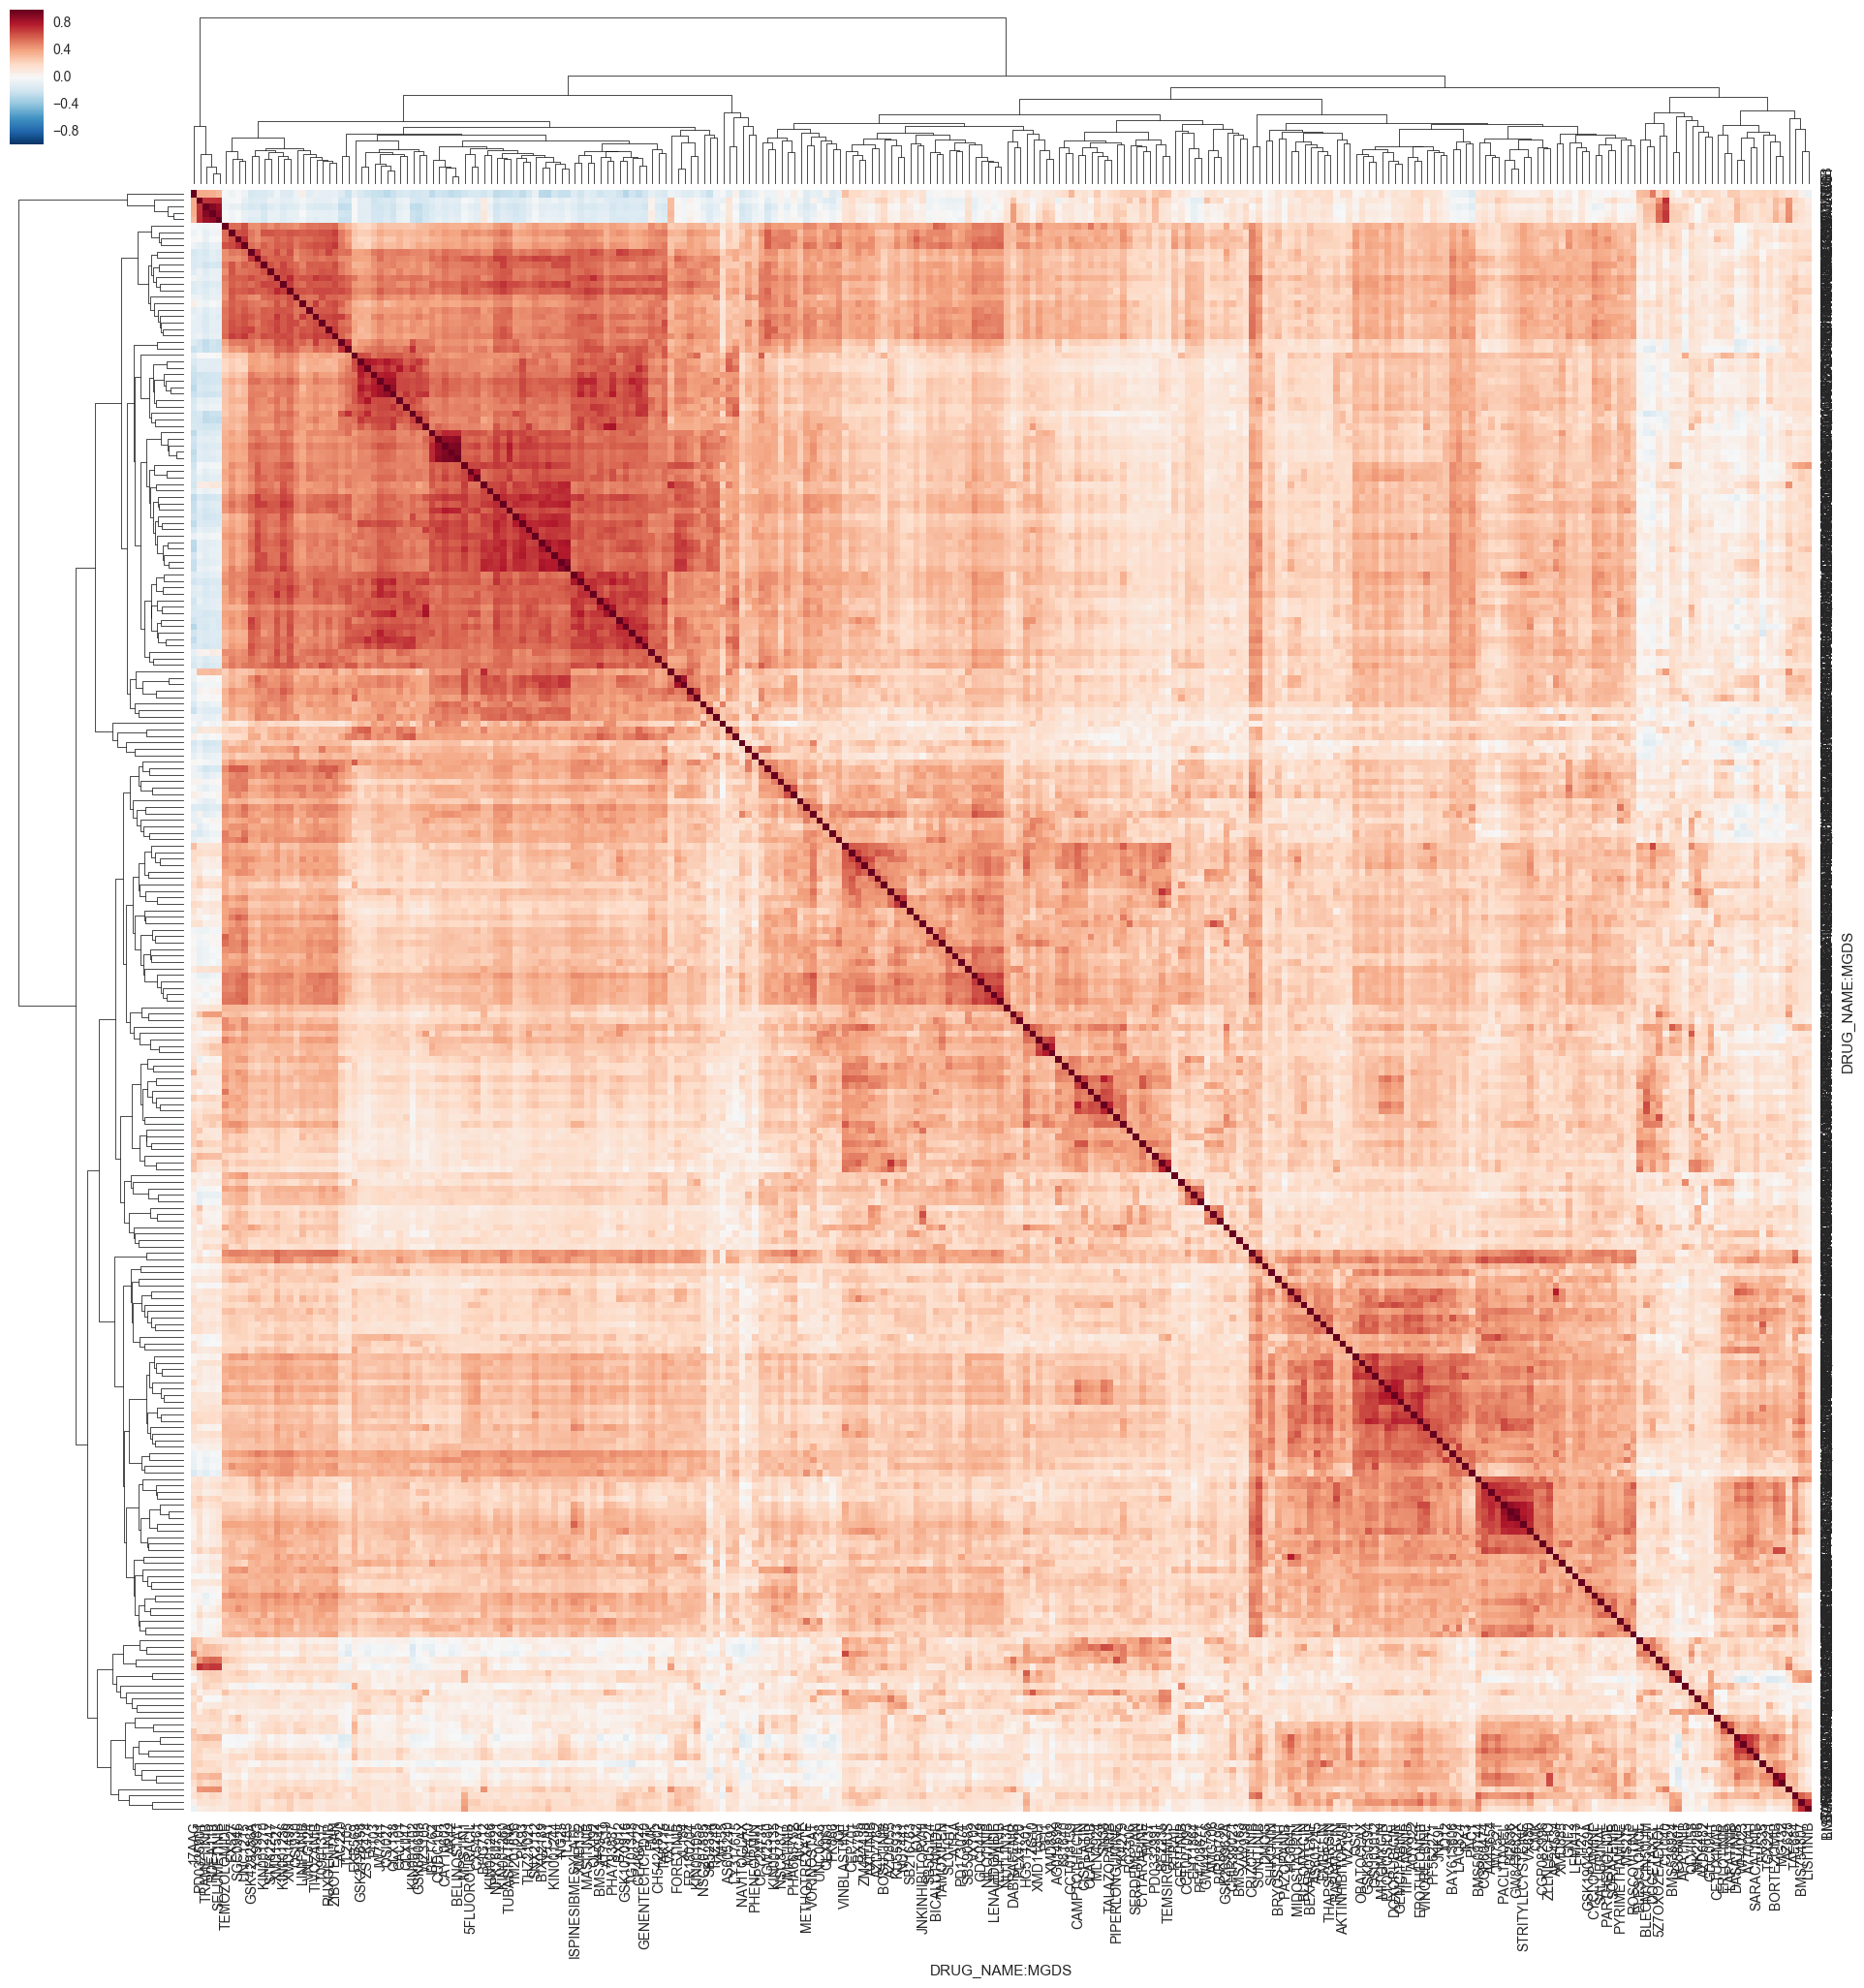

In [33]:
sns.clustermap(dc_spearman, figsize=(24, 24))

In [36]:
d_corr = pd.concat([
    dc_spearman.loc['NAVITOCLAX'].rename('spearman'),
    dc_pearson.loc['NAVITOCLAX'].rename('pearson')
], axis=1)
d_corr['rank'] = d_corr.abs().mean(axis=1)
d_corr.sort_values('rank', ascending=False).head(50)

,spearman,pearson,rank
DRUG_NAME:MGDS,,,
NAVITOCLAX,1.000000,1.000000,1.000000
VORINOSTAT,0.492877,0.488601,0.490739
VX702,0.411241,0.419953,0.415597
NILOTINIB,0.403612,0.394342,0.398977
GSK1070916,0.315788,0.447552,0.381670
GDC0449,0.365943,0.372839,0.369391
NPK76II721,0.327282,0.395243,0.361263
BX912,0.315085,0.406762,0.360924
AICAR,0.334404,0.378815,0.356609
